<a href="https://colab.research.google.com/github/GOWRISHANKARK80/CNC-Milling-/blob/main/Tool_wear_prediction_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import glob

# Load the train dataset
train_df = pd.read_csv("/content/train (1).csv")

# Get all time series CSV file paths and sort them
time_series_files = sorted(glob.glob("/content/*.csv"))  # Adjust path pattern if needed

# Dictionary to store time series dataframes dynamically as df1, df2, ..., df18
dfs = {}

# Load all time series datasets into the dictionary
for i, file in enumerate(time_series_files, start=1):
    dfs[f'df{i}'] = pd.read_csv(file)

# List to store merged datasets
merged_dfs = []

# Loop through all 18 time series datasets and merge with the corresponding train row
for i in range(1, 19):
    ts_df = dfs[f'df{i}']  # Get the time series dataframe (df1, df2, ..., df18)
    train_row = train_df.iloc[[i - 1]].reset_index(drop=True)  # Get the corresponding train row

    # Repeat train_row for all rows in the corresponding time series dataset
    train_expanded = train_row.loc[train_row.index.repeat(len(ts_df))].reset_index(drop=True)

    # Merge time series dataset with corresponding train row
    merged_df = pd.concat([ts_df.reset_index(drop=True), train_expanded], axis=1)

    # Store merged dataset
    merged_dfs.append(merged_df)  # ✅ Corrected this line

# Combine all merged datasets into a single dataframe and assign to `df`
df = pd.concat(merged_dfs, ignore_index=True)

# Save the final merged dataset
df.to_csv("/content/final_dataset.csv", index=False)

print("✅ Successfully merged all time series datasets with the train dataset!")


✅ Successfully merged all time series datasets with the train dataset!


In [19]:
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,wo

In [20]:
pd.set_option('display.max_columns', None)
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0,End,18,wax,3,2.5,wo

In [21]:
df.set_index("No", inplace=True)

In [22]:
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,End,wax,3,2.5,worn,yes,yes
18,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,End,wax,3,2.5,worn,yes,yes
18,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 1 to 18
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 14

In [24]:
df.isnull().sum()

,0
X1_ActualPosition,0
X1_ActualVelocity,0
X1_ActualAcceleration,0
X1_CommandPosition,0
X1_CommandVelocity,0
X1_CommandAcceleration,0
X1_CurrentFeedback,0
X1_DCBusVoltage,0
X1_OutputCurrent,0
X1_OutputVoltage,0


In [25]:
df.isnull().sum()

,0
X1_ActualPosition,0
X1_ActualVelocity,0
X1_ActualAcceleration,0
X1_CommandPosition,0
X1_CommandVelocity,0
X1_CommandAcceleration,0
X1_CurrentFeedback,0
X1_DCBusVoltage,0
X1_OutputCurrent,0
X1_OutputVoltage,0


In [26]:
df.duplicated()

,0
No,
1,False
1,False
1,False
1,False
1,False
...,...
18,False
18,False
18,False


In [27]:
df.head()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,198.0,0.0,0.00,198.0,0.0,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.0,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.0,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.0,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,Starting,wax,6,4.0,unworn,yes,yes
1,198.0,-10.8,-350.00,198.0,-13.6,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.6,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.3,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.0,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,196.0,-17.8,-6.25,196.0,-17.9,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.3,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.7,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.0,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,194.0,-18.0,0.00,194.0,-17.9,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.3,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.7,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.0,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes
1,193.0,-17.9,-18.80,192.0,-17.9,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.3,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.6,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.0,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,Prep,wax,6,4.0,unworn,yes,yes


In [28]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

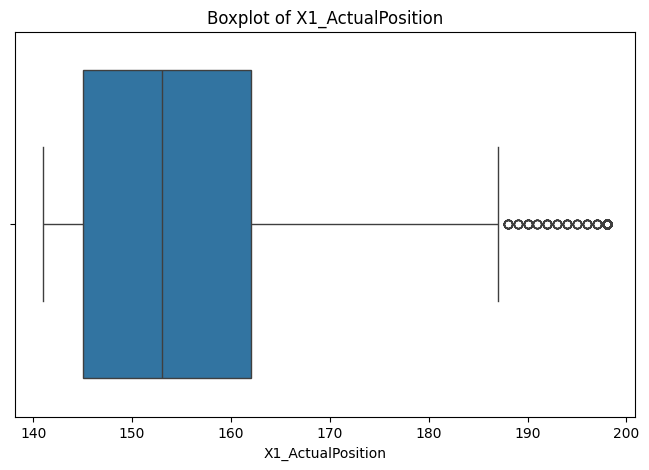

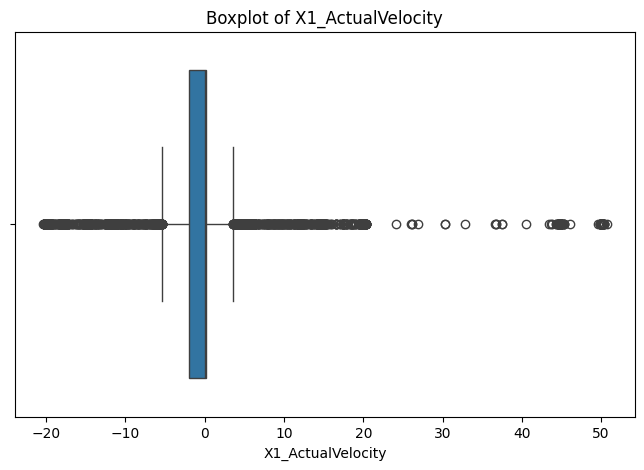

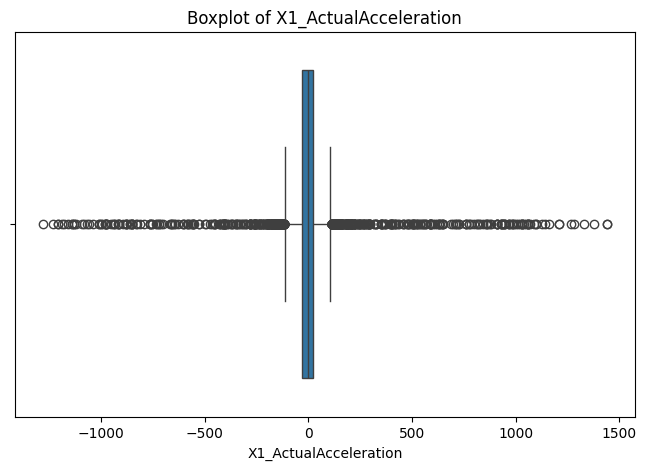

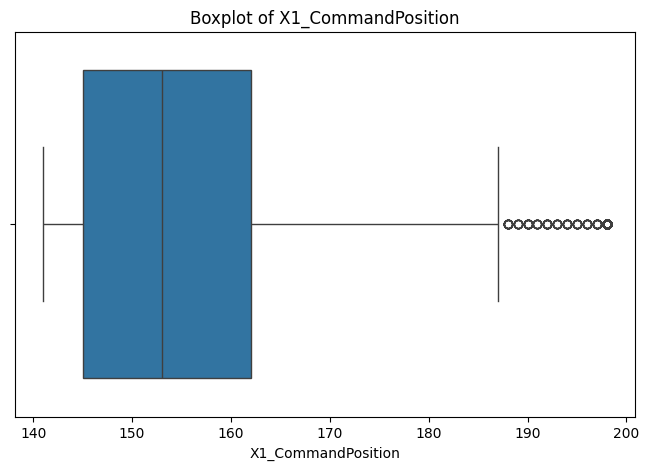

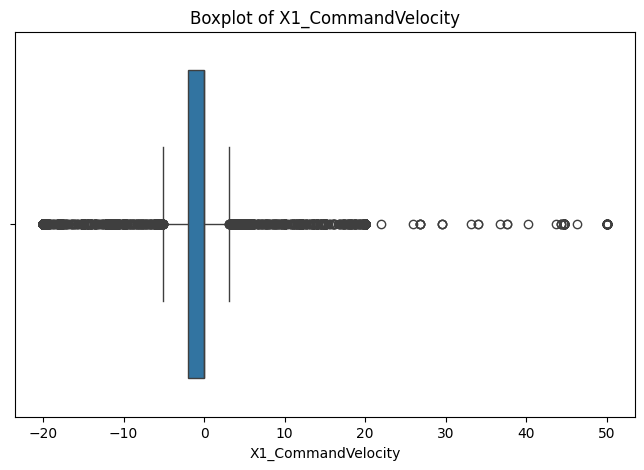

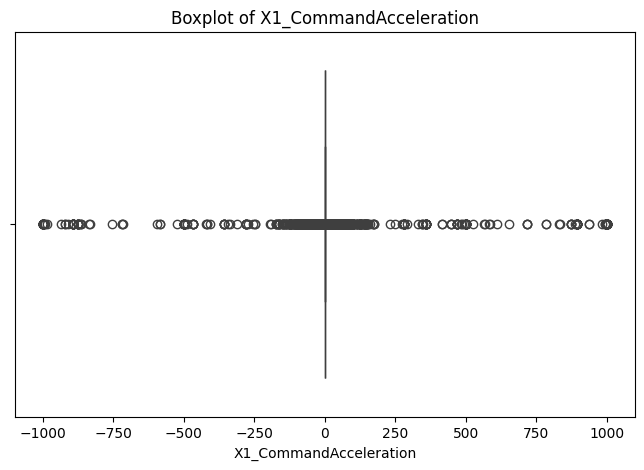

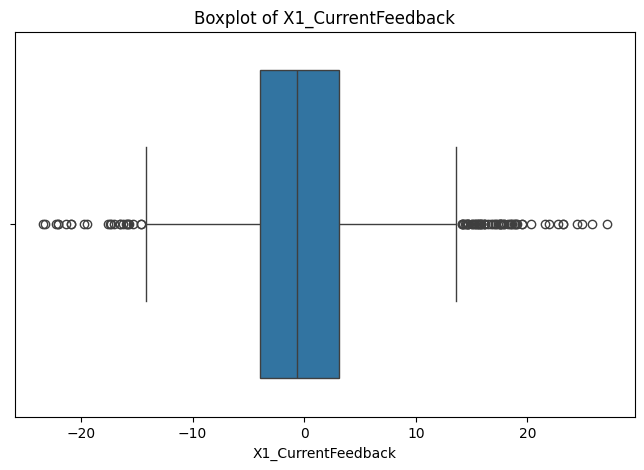

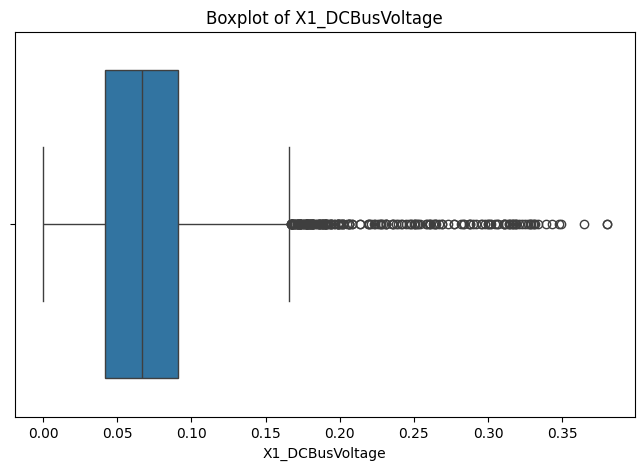

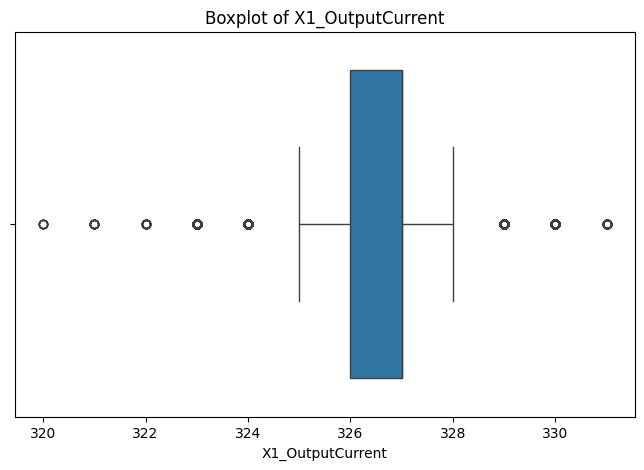

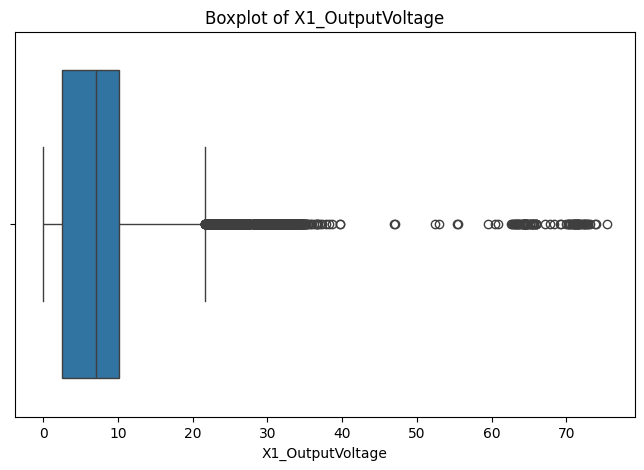

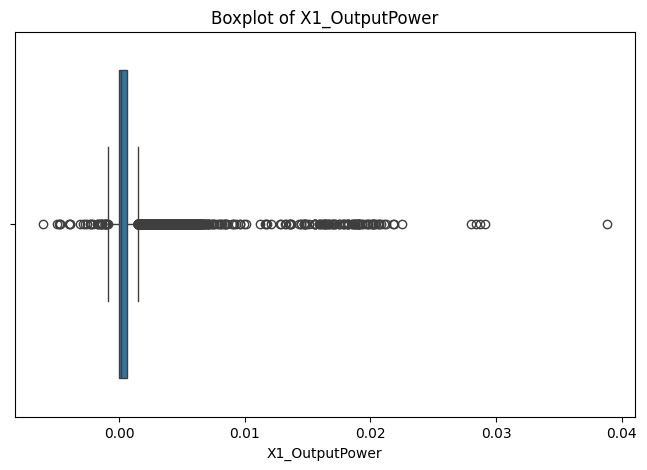

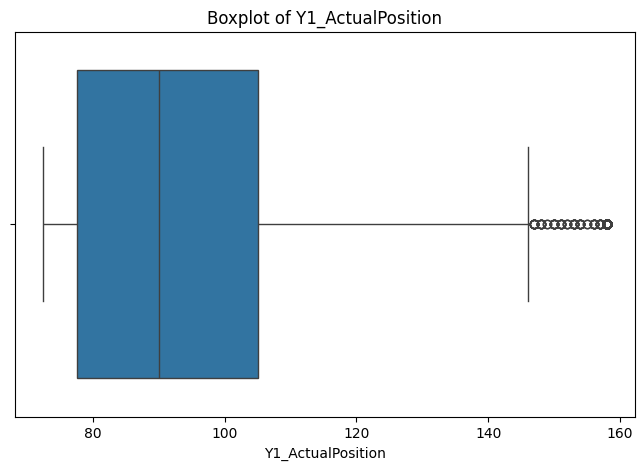

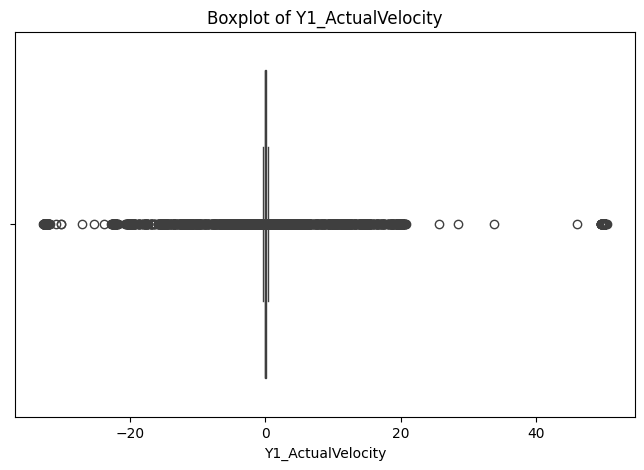

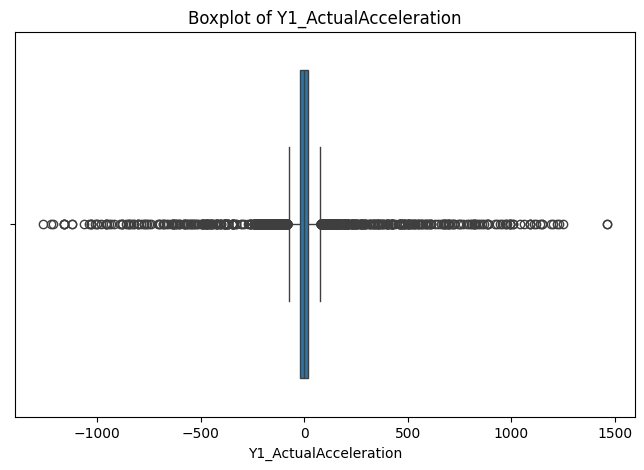

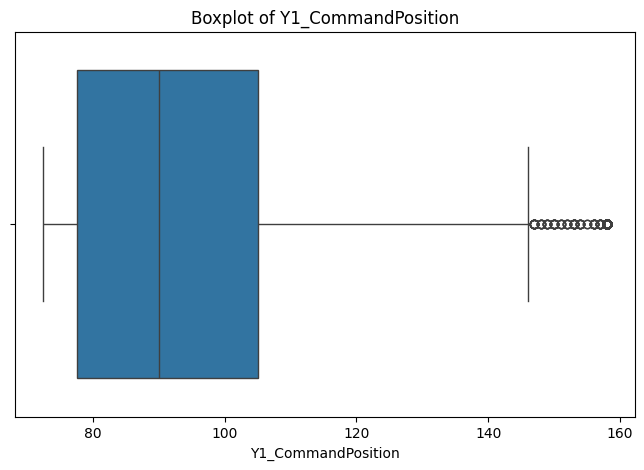

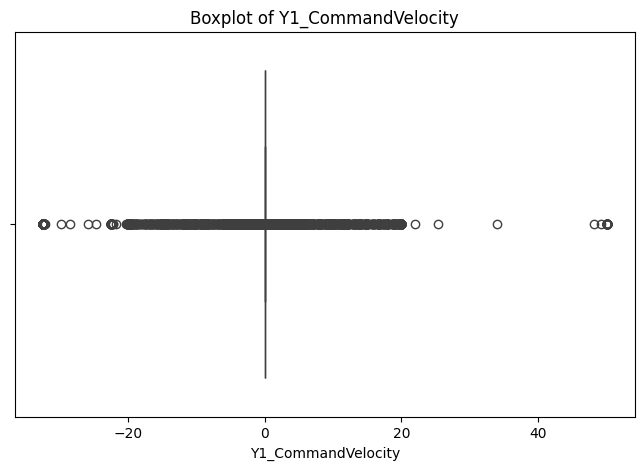

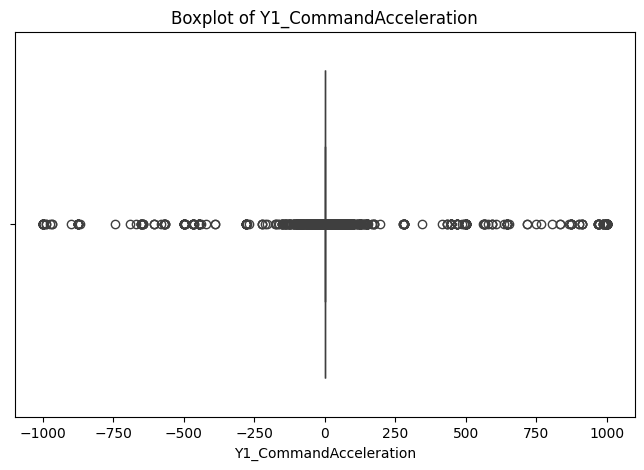

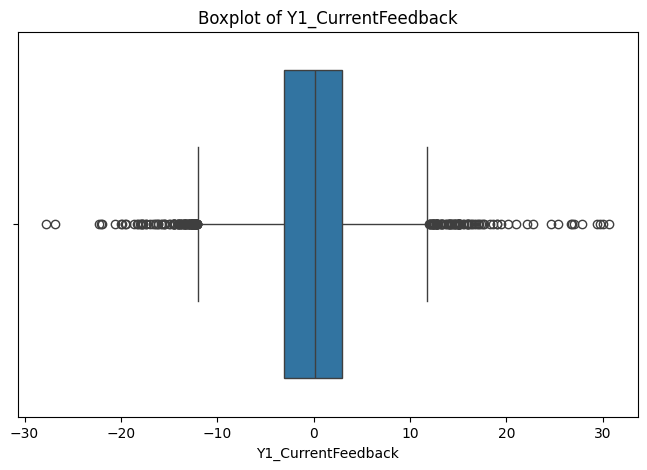

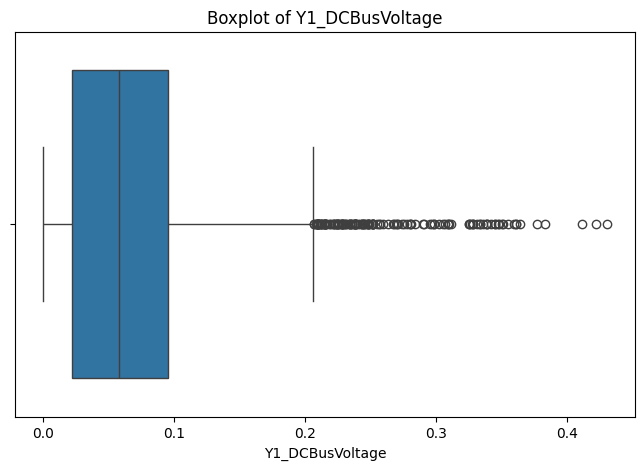

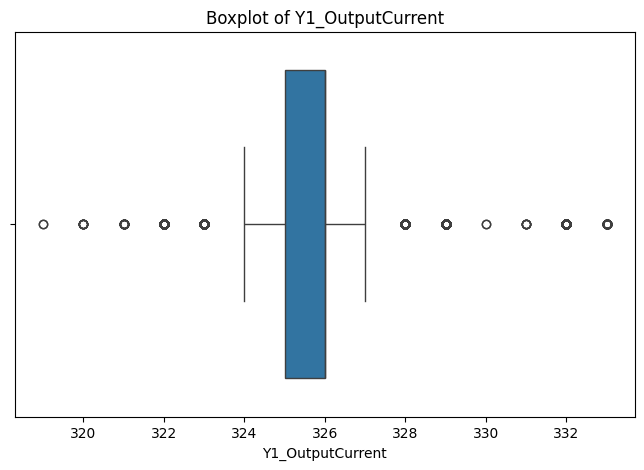

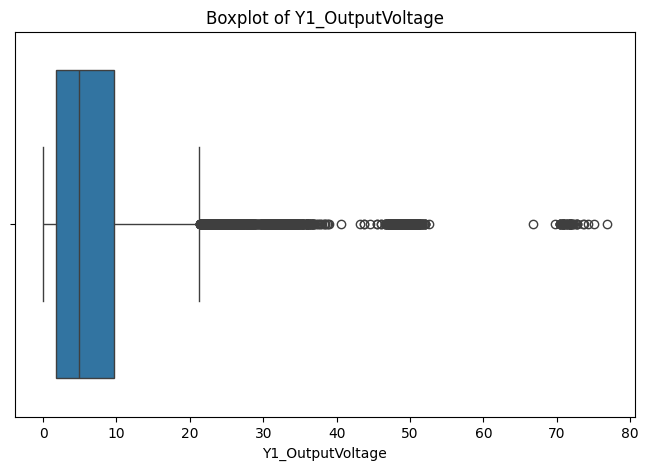

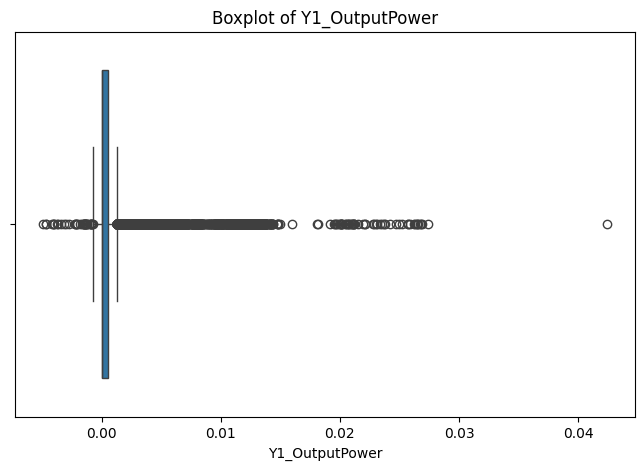

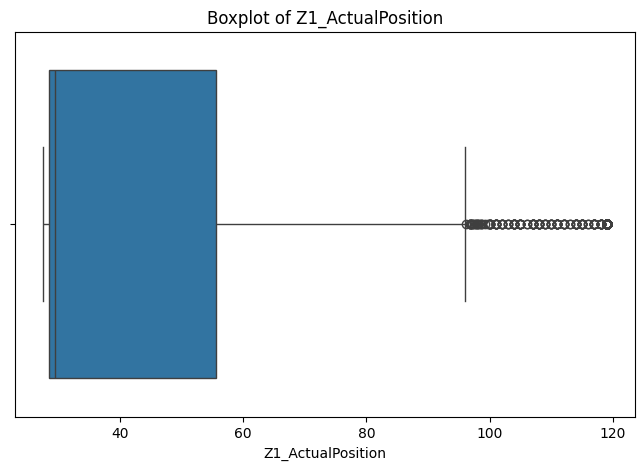

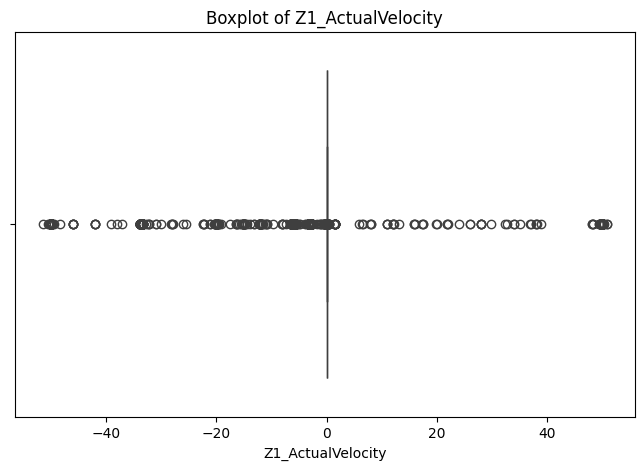

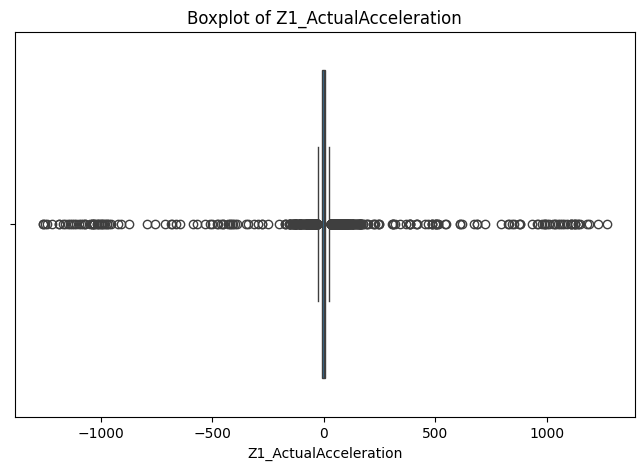

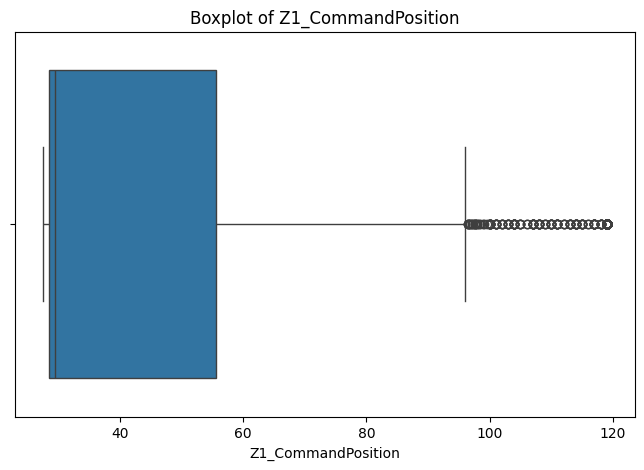

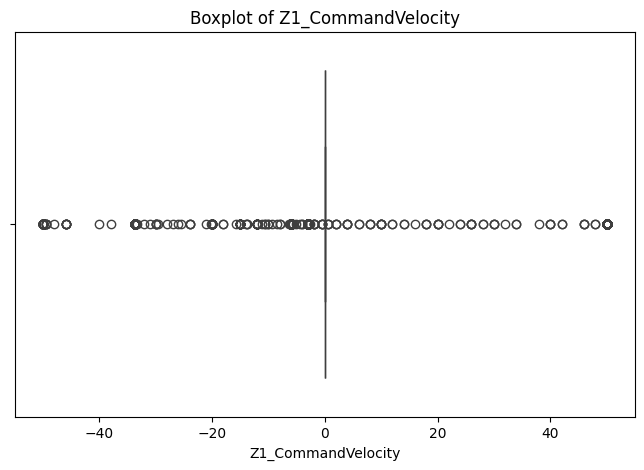

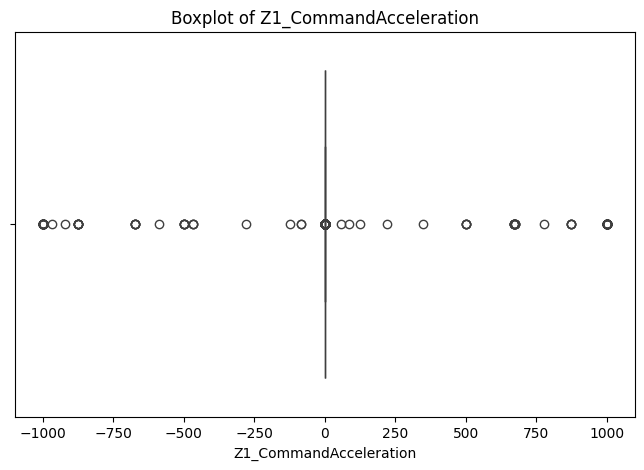

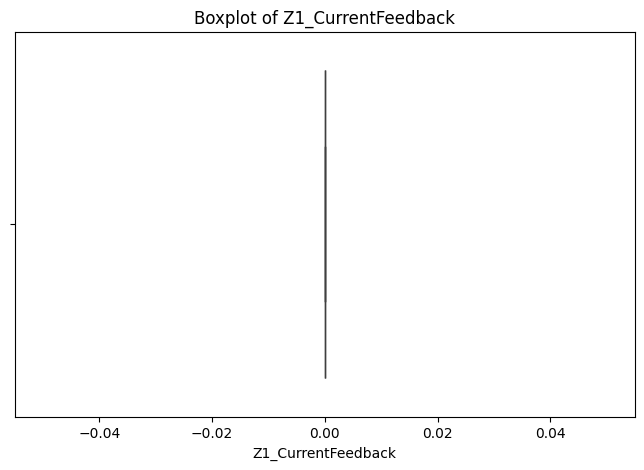

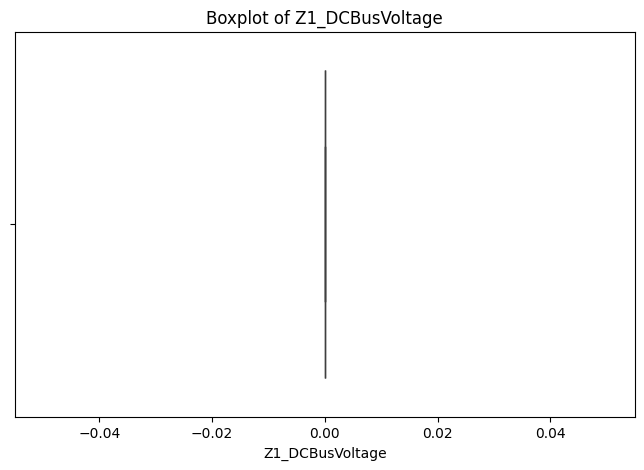

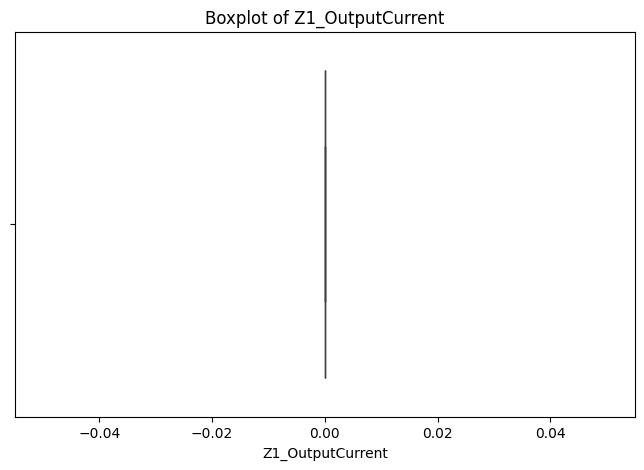

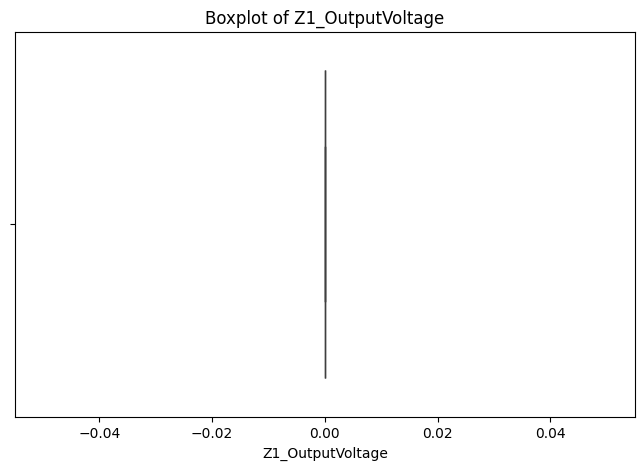

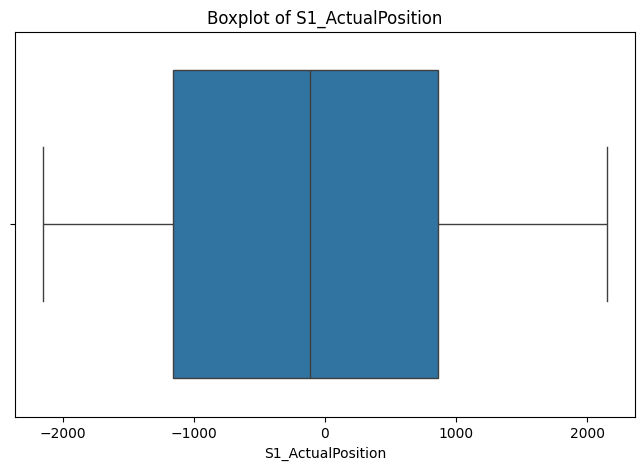

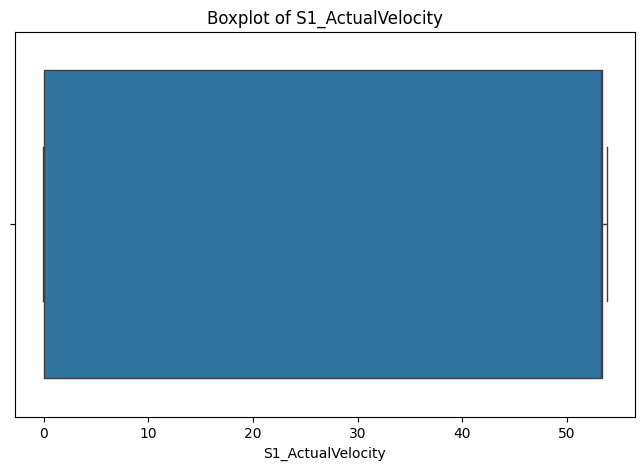

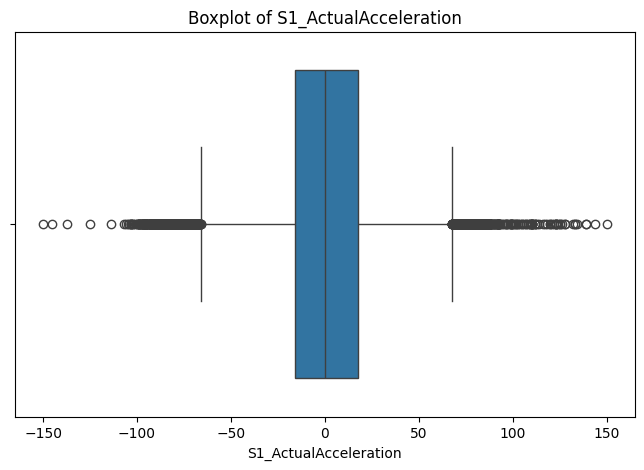

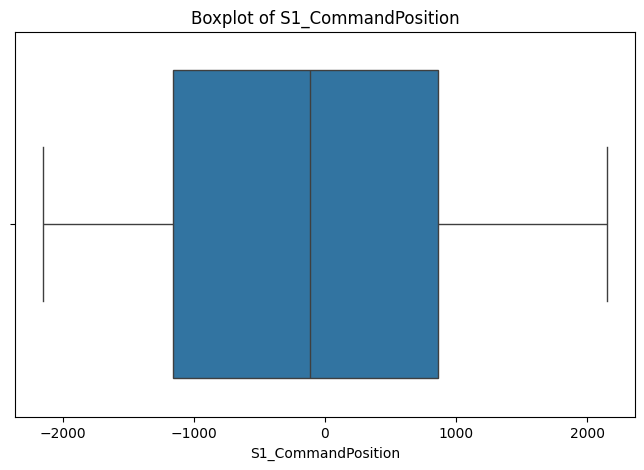

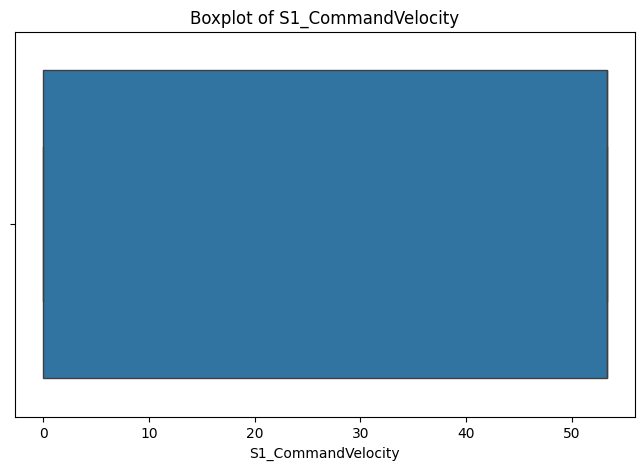

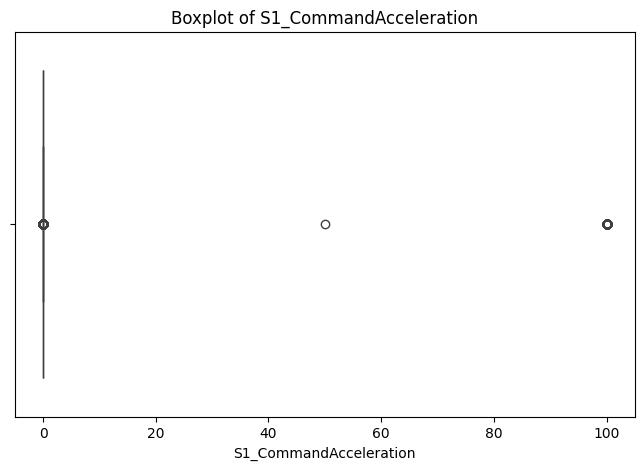

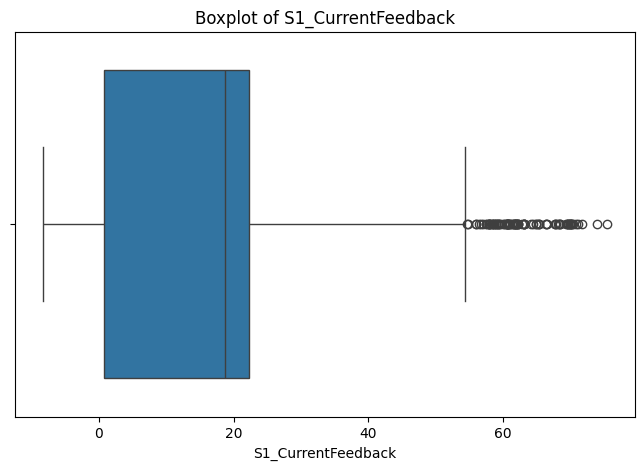

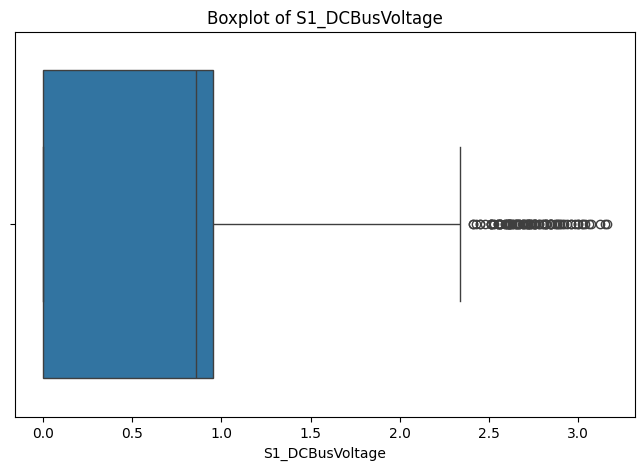

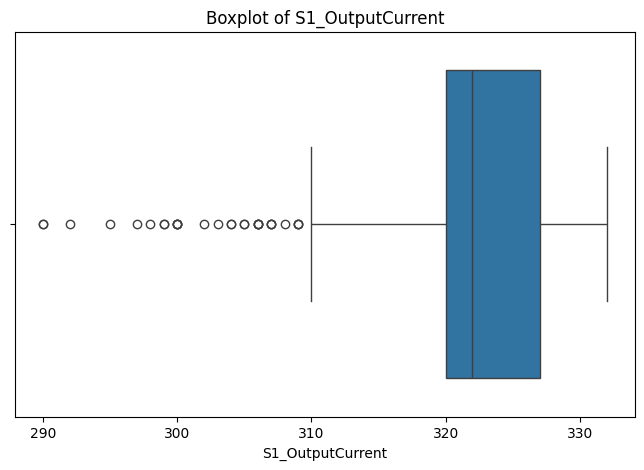

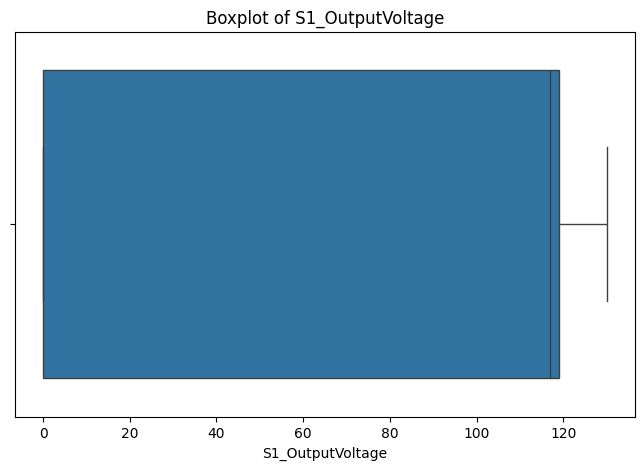

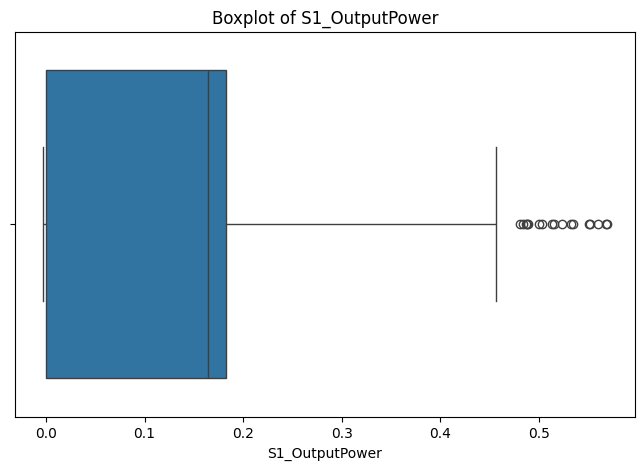

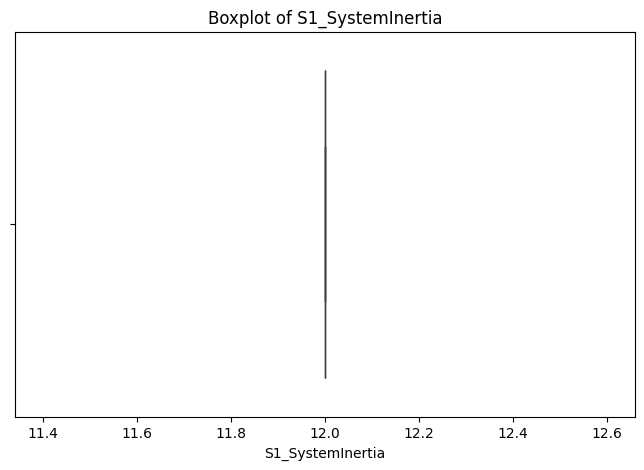

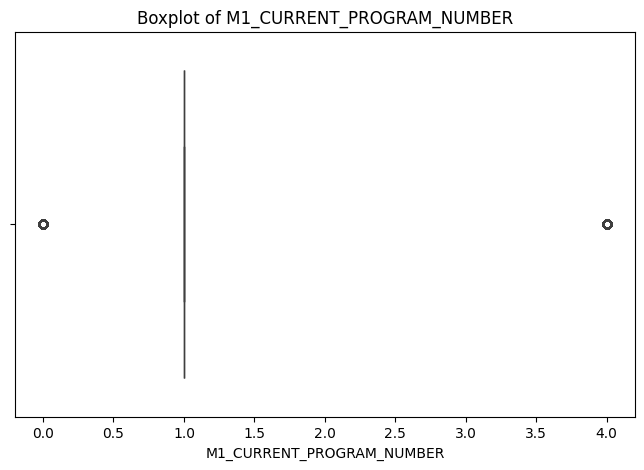

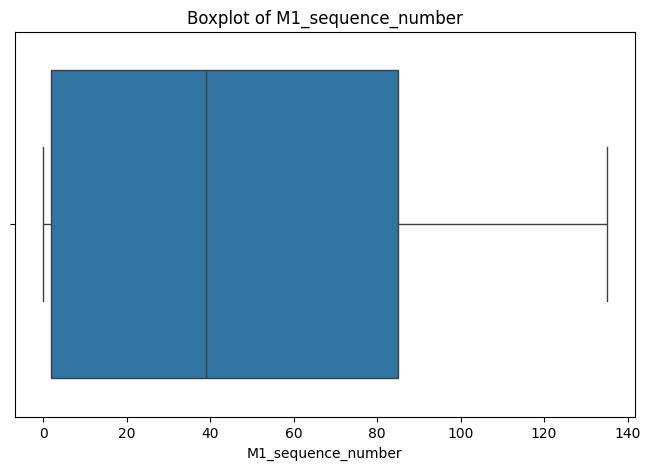

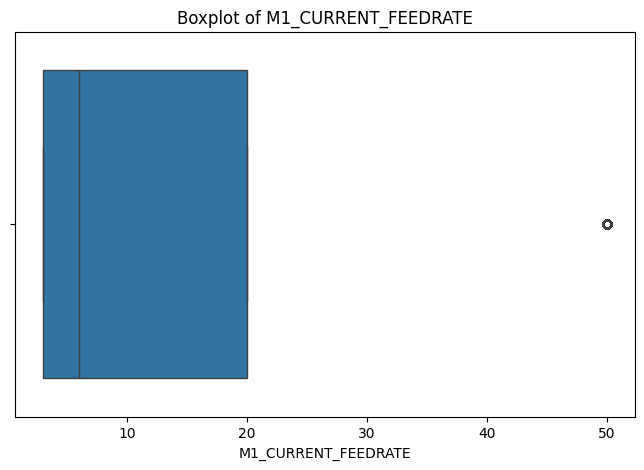

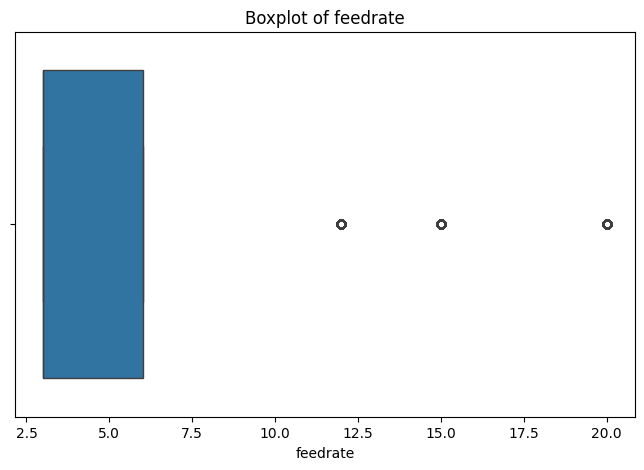

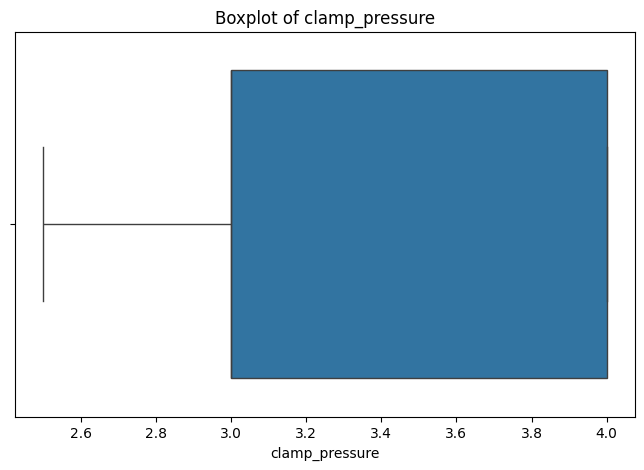

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 1 to 18
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 14

In [31]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Machining_Process', 'material', 'tool_condition',
                    'machining_finalized', 'passed_visual_inspection']

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df['passed_visual_inspection'].fillna(0, inplace=True)

<ipython-input-32-6442207cd9eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['passed_visual_inspection'].fillna(0, inplace=True)


In [33]:
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,Z1_CurrentFeedback,Z1_DCBusVoltage,Z1_OutputCurrent,Z1_OutputVoltage,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,S1_SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,0.0,0.0,0.0,0.0,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,12.0,1.0,0.0,50.0,9,0,6,4.0,0,1,1
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,0.0,0.0,0.0,0.0,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,12.0,1.0,4.0,50.0,7,0,6,4.0,0,1,1
1,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,0.0,0.0,0.0,0.0,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,12.0,1.0,7.0,50.0,7,0,6,4.0,0,1,1
1,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,12.0,1.0,7.0,50.0,7,0,6,4.0,0,1,1
1,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,0.0,0.0,0.0,0.0,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,12.0,1.0,7.0,50.0,7,0,6,4.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,12.0,1.0,57.0,3.0,0,0,3,2.5,1,1,1
18,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,12.0,1.0,57.0,3.0,0,0,3,2.5,1,1,1
18,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,0.0,0.0,0.0,0.0,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,12.0,1.0,57.0,3.0,0,0,3,2.5,1,1,1


In [34]:
df = df.loc[:, df.nunique() > 1]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25286 entries, 1 to 18
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  float64
 14

In [36]:
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
No,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,1.0,0.0,50.0,9,6,4.0,0,1,1
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,1.0,4.0,50.0,7,6,4.0,0,1,1
1,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,1.0,7.0,50.0,7,6,4.0,0,1,1
1,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,1.0,7.0,50.0,7,6,4.0,0,1,1
1,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,1.0,7.0,50.0,7,6,4.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1
18,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1
18,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1


In [37]:
# Assuming 'df' is your cleaned dataset
cleaned_dataset_path = "/content/encoded_dataset.csv"  # Save in Colab environment

# Save the cleaned dataset as a CSV file
df.to_csv(cleaned_dataset_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_dataset_path}")


Cleaned dataset saved successfully at: /content/encoded_dataset.csv


In [38]:
df.corr()

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
X1_ActualPosition,1.000000,-0.027925,-0.015813,0.999897,-0.030200,-0.022721,0.075901,-0.522043,0.349605,-0.290193,-0.080891,0.888528,-0.102731,-0.008712,0.888413,-0.103280,-0.005101,-0.131606,-0.341243,0.500171,-0.124481,0.033841,0.880043,-0.109356,-0.005602,0.879920,-0.109685,-0.006820,-0.103477,-0.663605,0.001704,-0.103584,-0.644630,-0.028627,-0.593782,-0.613660,0.530134,-0.644873,-0.626264,0.016684,-0.408106,0.436281,-0.067427,0.453219,0.108508,-0.091920,-0.339549,0.195855
X1_ActualVelocity,-0.027925,1.000000,0.042899,-0.025593,0.994736,-0.054833,0.656705,-0.007850,-0.057059,0.063614,0.190011,0.012624,0.296476,-0.013794,0.013041,0.297780,0.004757,-0.038403,-0.056749,-0.022695,-0.102756,-0.085863,0.006283,0.237343,-0.002692,0.006709,0.237102,-0.004960,0.009144,0.064024,-0.020281,0.009154,0.062270,-0.055246,0.041381,0.041160,-0.035890,0.061762,0.048899,0.002800,0.020850,-0.021601,-0.001131,-0.007987,-0.017314,-0.008353,-0.018623,0.026073
X1_ActualAcceleration,-0.015813,0.042899,1.000000,-0.015834,0.082456,0.389891,0.147840,0.078077,-0.016064,0.046832,0.107488,-0.005514,0.004232,-0.069679,-0.005500,0.000900,-0.042824,-0.000710,0.017137,-0.000308,0.009535,0.020056,0.001489,0.007526,0.008779,0.001510,0.008814,0.017044,-0.004451,-0.006438,-0.013959,-0.004453,-0.006917,-0.012156,-0.006727,-0.008171,0.003505,-0.007081,-0.002979,0.001840,-0.007341,0.015675,-0.011401,0.022708,0.011408,0.004147,-0.020225,0.003851
X1_CommandPosition,0.999897,-0.025593,-0.015834,1.000000,-0.027861,-0.022636,0.077469,-0.522235,0.349688,-0.290381,-0.080774,0.888720,-0.102159,-0.008735,0.888606,-0.102704,-0.005124,-0.131647,-0.341377,0.500264,-0.124810,0.033501,0.880197,-0.108794,-0.005579,0.880076,-0.109122,-0.006817,-0.103486,-0.663566,0.001694,-0.103592,-0.644593,-0.028754,-0.593789,-0.613666,0.530155,-0.644838,-0.626251,0.016690,-0.408173,0.436145,-0.067433,0.453153,0.108510,-0.092029,-0.339441,0.195863
X1_CommandVelocity,-0.030200,0.994736,0.082456,-0.027861,1.000000,0.039428,0.676604,-0.001226,-0.058431,0.065110,0.198001,0.012194,0.296302,-0.018416,0.012610,0.296830,-0.002568,-0.039376,-0.053593,-0.023493,-0.101989,-0.085068,0.005361,0.236578,-0.000358,0.005786,0.236534,-0.001801,0.008275,0.064718,-0.020636,0.008285,0.063127,-0.056859,0.041457,0.041234,-0.036472,0.062592,0.049627,0.003463,0.020269,-0.021655,-0.001085,-0.006797,-0.017402,-0.008909,-0.018632,0.026464
X1_CommandAcceleration,-0.022721,-0.054833,0.389891,-0.022636,0.039428,1.000000,0.126885,0.059561,-0.010022,0.016314,0.070454,-0.004594,-0.002265,-0.051468,-0.004601,-0.009045,-0.069560,-0.007101,0.022896,-0.002396,0.002139,0.002131,-0.004996,-0.002825,0.020034,-0.004998,-0.000946,0.030569,-0.005643,0.003370,-0.004164,-0.005645,0.004543,-0.017179,-0.002499,-0.002751,-0.002754,0.004140,0.003663,0.007051,-0.009969,0.004968,-0.002456,0.011360,0.000844,-0.005586,-0.003112,0.005024
X1_CurrentFeedback,0.075901,0.656705,0.147840,0.077469,0.676604,0.126885,1.000000,-0.013091,-0.076092,-0.009337,0.052380,0.045305,0.059434,-0.003931,0.045373,0.059384,-0.002817,-0.250374,0.001217,-0.047163,-0.045868,-0.064431,-0.028231,0.

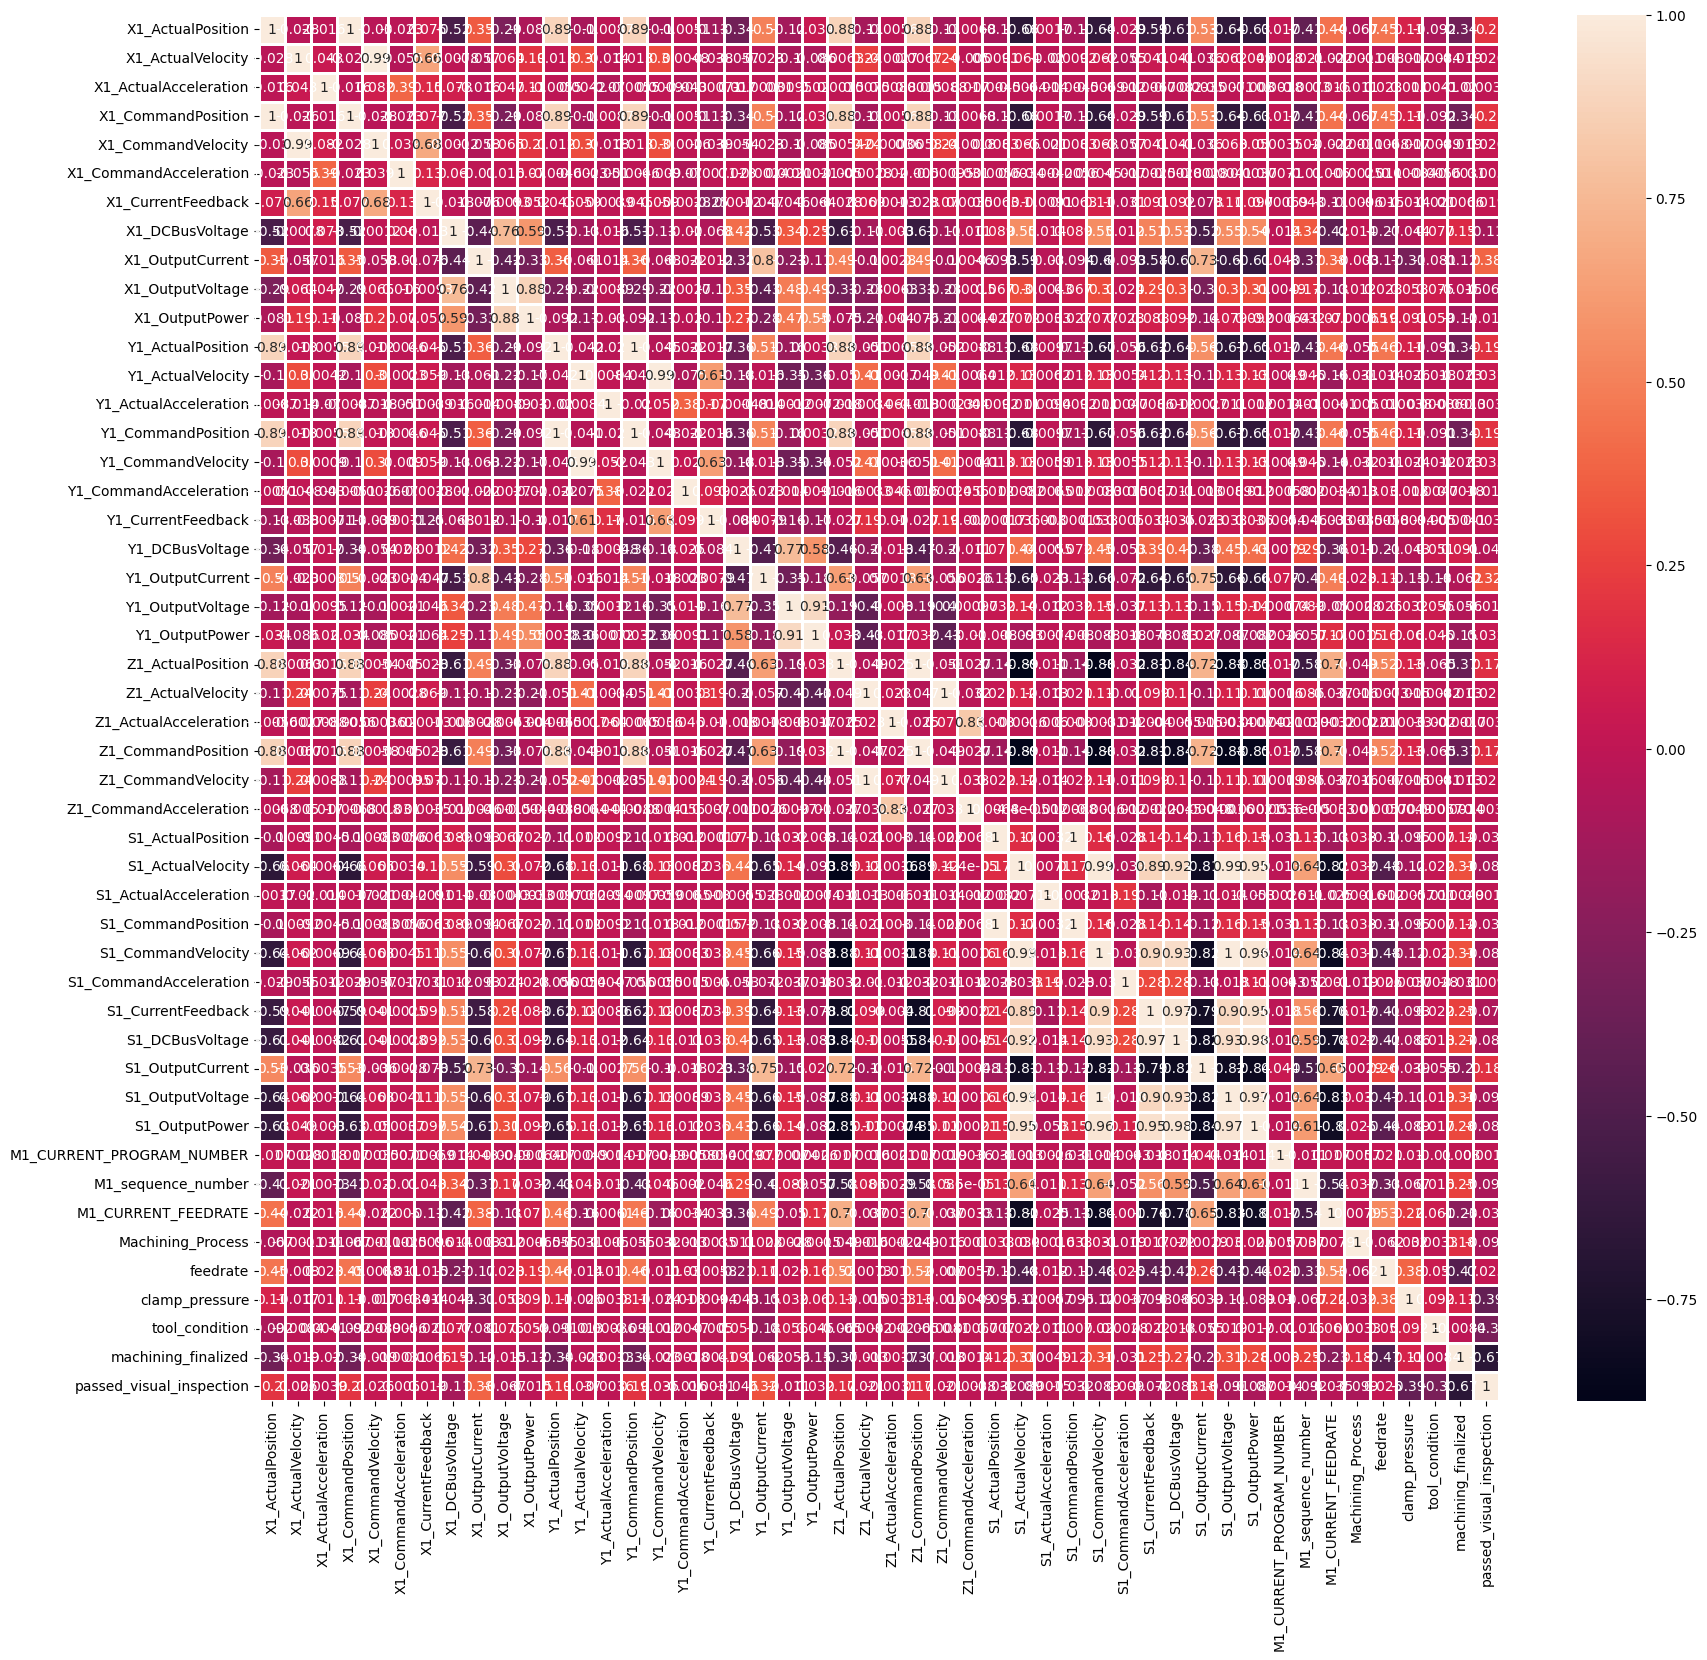

In [39]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),linewidths=1,annot=True)
plt.show()

In [40]:
corr=df.corr()

In [41]:
c=0
for i in corr.columns:
    if (abs(corr[i]) > 0.3).any():
      c=c+1
      print(i)
print(c)

X1_ActualPosition
X1_ActualVelocity
X1_ActualAcceleration
X1_CommandPosition
X1_CommandVelocity
X1_CommandAcceleration
X1_CurrentFeedback
X1_DCBusVoltage
X1_OutputCurrent
X1_OutputVoltage
X1_OutputPower
Y1_ActualPosition
Y1_ActualVelocity
Y1_ActualAcceleration
Y1_CommandPosition
Y1_CommandVelocity
Y1_CommandAcceleration
Y1_CurrentFeedback
Y1_DCBusVoltage
Y1_OutputCurrent
Y1_OutputVoltage
Y1_OutputPower
Z1_ActualPosition
Z1_ActualVelocity
Z1_ActualAcceleration
Z1_CommandPosition
Z1_CommandVelocity
Z1_CommandAcceleration
S1_ActualPosition
S1_ActualVelocity
S1_ActualAcceleration
S1_CommandPosition
S1_CommandVelocity
S1_CommandAcceleration
S1_CurrentFeedback
S1_DCBusVoltage
S1_OutputCurrent
S1_OutputVoltage
S1_OutputPower
M1_CURRENT_PROGRAM_NUMBER
M1_sequence_number
M1_CURRENT_FEEDRATE
Machining_Process
feedrate
clamp_pressure
tool_condition
machining_finalized
passed_visual_inspection
48


In [42]:
df.columns

Index(['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'S1_ActualPosition', 'S1_ActualVelocity',
       'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity',
       'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage',
       'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower',
       'M1_CURRENT_PROGRAM_NUMBER', 'M1_sequence_number',
      

In [43]:
#hypotheses

continues=['X1_ActualPosition', 'X1_ActualVelocity', 'X1_ActualAcceleration',
       'X1_CommandPosition', 'X1_CommandVelocity', 'X1_CommandAcceleration',
       'X1_CurrentFeedback', 'X1_DCBusVoltage', 'X1_OutputCurrent',
       'X1_OutputVoltage', 'X1_OutputPower', 'Y1_ActualPosition',
       'Y1_ActualVelocity', 'Y1_ActualAcceleration', 'Y1_CommandPosition',
       'Y1_CommandVelocity', 'Y1_CommandAcceleration', 'Y1_CurrentFeedback',
       'Y1_DCBusVoltage', 'Y1_OutputCurrent', 'Y1_OutputVoltage',
       'Y1_OutputPower', 'Z1_ActualPosition', 'Z1_ActualVelocity',
       'Z1_ActualAcceleration', 'Z1_CommandPosition', 'Z1_CommandVelocity',
       'Z1_CommandAcceleration', 'S1_ActualPosition', 'S1_ActualVelocity',
       'S1_ActualAcceleration', 'S1_CommandPosition', 'S1_CommandVelocity',
       'S1_CommandAcceleration', 'S1_CurrentFeedback', 'S1_DCBusVoltage',
       'S1_OutputCurrent', 'S1_OutputVoltage', 'S1_OutputPower',
       'M1_CURRENT_PROGRAM_NUMBER', 'M1_sequence_number',
       'M1_CURRENT_FEEDRATE', 'feedrate',
       'clamp_pressure']
categories=['tool_condition', 'machining_finalized', 'passed_visual_inspection', 'Machining_Process']


from scipy import stats

def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.055:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

#defining function for categories vs categories
def chisqare_cat_vs_cat(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.055 else False

def annova_test(d1,d2):
  group=df[d2].unique()
  data={}
  for i in group:
    data[i]=df[d1][df[d2]==i]
  f_value,p_value=stats.f_oneway(*[i for i in data.values()])
  if p_value < 0.055:
    return False
  else:
    return True

final={}
for i in df.columns:
  final[i]={}
  for j in df.columns:
    if (i in continues) and (j in continues):
      result=two_sample(df[i],df[j])
    elif  (i in continues) and (j in categories):
      result=annova_test(i,j)
    elif (i in categories) and (j in continues):
      result=annova_test(j,i)
    elif (i in categories) and (j in categories):
      result=chisqare_cat_vs_cat(df[i],df[j])
    if result:
      final[i][j]=1
    else:
      final[i][j]=0

In [44]:
hypotest_df=pd.DataFrame(final)

In [45]:
hypotest_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
X1_ActualPosition,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X1_ActualVelocity,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
X1_ActualAcceleration,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,0
X1_CommandPosition,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X1_CommandVelocity,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
X1_CommandAcceleration,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1
X1_CurrentFeedback,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
X1_DCBusVoltage,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X1_OutputCurrent,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
X1_OutputVoltage,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
for i in continues:
    print(i,df[i].skew(),df[i].kurtosis())

X1_ActualPosition 1.219720699871402 0.07731529597508979
X1_ActualVelocity 1.7272956118106886 21.078787814158815
X1_ActualAcceleration 0.9124988506612538 69.9646965358057
X1_CommandPosition 1.219764790860602 0.07735687667259272
X1_CommandVelocity 1.71511383550511 20.80699555973343
X1_CommandAcceleration -0.0276586270011794 143.5230318036941
X1_CurrentFeedback 0.26964430716070614 0.21815671860733898
X1_DCBusVoltage 0.830361818185577 4.465558786143041
X1_OutputCurrent -0.03726266643388586 0.8731060664534667
X1_OutputVoltage 2.84474613787039 14.43056401234576
X1_OutputPower 7.594701274797004 88.35474631781024
Y1_ActualPosition 1.1994512726769069 0.032371798148599584
Y1_ActualVelocity -1.4480974469514714 22.919820910064047
Y1_ActualAcceleration 0.841915995261796 84.3943526925823
Y1_CommandPosition 1.1997222844698983 0.03318740880937732
Y1_CommandVelocity -1.4466076573154685 23.067340875896875
Y1_CommandAcceleration 1.9531173036288771 111.6882161892079
Y1_CurrentFeedback -0.05873311804381253

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
import pandas as pd

# Splitting dataset for multi-output classification
y = df[["passed_visual_inspection", "machining_finalized", "tool_condition"]]  # Multi-output targets
x = df.drop(["passed_visual_inspection", "machining_finalized", "tool_condition"], axis=1)  # Features

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Scaling features
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

# Build model
model = Sequential()

model.add(Dense(128, input_dim=x_train_scaler.shape[1], activation="relu"))
model.add(Dropout(0.30))
model.add(BatchNormalization())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.20))
model.add(BatchNormalization())

model.add(Dense(32, activation="relu"))
model.add(Dropout(0.10))

model.add(Dense(3, activation="sigmoid"))  # 3 outputs for multi-output classification

# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',tf.keras.metrics.F1Score()])

# Train model
result = model.fit(x_train_scaler, y_train, epochs=28, validation_data=(x_test_scaler, y_test), batch_size=64)

df_result = pd.DataFrame(result.history)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4111 - f1_score: 0.5088 - loss: 0.3286 - val_accuracy: 0.3206 - val_f1_score: 0.4599 - val_loss: -3.7325
Epoch 2/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6137 - f1_score: 0.4918 - loss: -13.2915 - val_accuracy: 0.4931 - val_f1_score: 0.4926 - val_loss: -70.2522
Epoch 3/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8567 - f1_score: 0.4943 - loss: -102.6178 - val_accuracy: 0.9151 - val_f1_score: 0.5148 - val_loss: -257.1631
Epoch 4/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8921 - f1_score: 0.5821 - loss: -344.3326 - val_accuracy: 0.9548 - val_f1_score: 0.6431 - val_loss: -620.7291
Epoch 5/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9059 - f1_score: 0.6170 - loss: -811.6331 - val_accuracy: 0.9473 - val_f1_score: 0.6522 - val_loss: -1204.0841
Epoch 6/28
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9112 - f1_score: 0.6316 - loss: -1399.9342 - val_accuracy: 0

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import tensorflow as tf
import pandas as pd

# Splitting dataset for multi-output classification
y = df[["passed_visual_inspection", "machining_finalized", "tool_condition"]]  # Multi-output targets
x = df.drop(["passed_visual_inspection", "machining_finalized", "tool_condition"], axis=1)  # Features

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Scaling features
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

# Build model
model1 = Sequential()

model1.add(Dense(128, input_dim=x_train_scaler.shape[1], activation="relu"))
model1.add(Dropout(0.30))
model1.add(BatchNormalization())

model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.20))
model1.add(BatchNormalization())

model1.add(Dense(32, activation="relu"))
model1.add(Dropout(0.10))

model1.add(Dense(3, activation="sigmoid"))  # 3 outputs for multi-output classification

# Compile model
model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy',tf.keras.metrics.F1Score()])

# Train model
result = model1.fit(x_train_scaler, y_train, epochs=20, validation_data=(x_test_scaler, y_test), batch_size=64)

df_result = pd.DataFrame(result.history)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5585 - f1_score: 0.4946 - loss: 0.1152 - val_accuracy: 0.3990 - val_f1_score: 0.4733 - val_loss: -5.7151
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6564 - f1_score: 0.4927 - loss: -19.2928 - val_accuracy: 0.5595 - val_f1_score: 0.4995 - val_loss: -90.5948
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8553 - f1_score: 0.4998 - loss: -137.7206 - val_accuracy: 0.9061 - val_f1_score: 0.4979 - val_loss: -327.3395
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8898 - f1_score: 0.5862 - loss: -427.8601 - val_accuracy: 0.9489 - val_f1_score: 0.6492 - val_loss: -723.0886
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9116 - f1_score: 0.6142 - loss: -994.0780 - val_accuracy: 0.9485 - val_f1_score: 0.6430 - val_loss: -1401.2675
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9163 - f1_score: 0.6233 - loss: -1779.9862 - val_accuracy: 0

In [58]:
df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,X1_OutputPower,Y1_ActualPosition,Y1_ActualVelocity,Y1_ActualAcceleration,Y1_CommandPosition,Y1_CommandVelocity,Y1_CommandAcceleration,Y1_CurrentFeedback,Y1_DCBusVoltage,Y1_OutputCurrent,Y1_OutputVoltage,Y1_OutputPower,Z1_ActualPosition,Z1_ActualVelocity,Z1_ActualAcceleration,Z1_CommandPosition,Z1_CommandVelocity,Z1_CommandAcceleration,S1_ActualPosition,S1_ActualVelocity,S1_ActualAcceleration,S1_CommandPosition,S1_CommandVelocity,S1_CommandAcceleration,S1_CurrentFeedback,S1_DCBusVoltage,S1_OutputCurrent,S1_OutputVoltage,S1_OutputPower,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,-0.000001,158.0,-0.025,-6.25,158.0,0.00,0.000000,0.539,0.0167,328.0,1.84,6.430000e-07,119.0,0.000,0.00,119.0,0.0,0.000000,-361.0,0.001,0.250,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,329.0,0.0,6.960000e-07,1.0,0.0,50.0,9,6,4.0,0,1,1
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,0.004480,158.0,-19.800,-750.00,157.0,-24.60,-647.000000,-14.500,0.2810,325.0,37.80,1.260000e-02,119.0,-20.300,-712.00,118.0,-25.6,-674.000000,-361.0,0.000,0.250,-361.0,0.0,0.000000e+00,-0.288,2.740000e-19,328.0,0.0,-5.270000e-07,1.0,4.0,50.0,7,6,4.0,0,1,1
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,0.005330,154.0,-32.500,0.00,154.0,-32.30,-0.000095,-7.790,0.1390,327.0,49.40,9.430000e-03,115.0,-33.700,37.50,115.0,-33.7,-0.000095,-361.0,0.000,-0.438,-361.0,0.0,0.000000e+00,0.524,2.740000e-19,328.0,0.0,9.100000e-07,1.0,7.0,50.0,7,6,4.0,0,1,1
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,0.004890,151.0,-32.600,-62.50,151.0,-32.30,-0.000095,-8.130,0.1560,325.0,47.60,1.050000e-02,112.0,-33.700,-6.25,112.0,-33.7,0.000000,-361.0,-0.001,-0.250,-361.0,0.0,0.000000e+00,-0.180,2.740000e-19,328.0,0.0,1.070000e-06,1.0,7.0,50.0,7,6,4.0,0,1,1
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,0.004250,148.0,-32.000,138.00,148.0,-32.30,0.000095,-13.800,0.2020,326.0,47.10,1.350000e-02,109.0,-33.600,18.80,108.0,-33.7,0.000000,-361.0,0.000,-0.188,-361.0,0.0,0.000000e+00,0.226,2.740000e-19,328.0,0.0,1.960000e-06,1.0,7.0,50.0,7,6,4.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,0.000366,73.7,1.450,-25.00,73.7,1.55,1.620000,4.680,0.0633,326.0,7.49,1.860000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,-72.4,53.300,-63.600,-72.0,53.3,0.000000e+00,20.000,8.260000e-01,323.0,118.0,1.580000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,0.000506,73.8,1.700,-12.50,73.9,1.71,1.550000,5.360,0.0787,326.0,8.17,2.620000e-04,28.7,0.000,-6.25,28.7,0.0,0.000000,-67.1,53.400,41.200,-66.6,53.3,9.540000e-07,18.800,9.710000e-01,320.0,119.0,1.870000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,0.000215,74.0,1.770,-12.50,74.0,1.86,1.480000,7.570,0.1110,326.0,7.67,4.040000e-04,28.7,0.000,0.00,28.7,0.0,0.000000,-61.7,53.300,-22.300,-61.3,53.3,-9.540000e-07,24.400,9.500000e-01,322.0,119.0,1.820000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,0.000330,74.2,1.980,0.00,74.2,2.01,1.410000,7.540,0.1250,326.0,10.60,5.400000e-04,28.7,-0.025,-6.25,28.7,0.0,0.000000,-56.4,53.200,-64.400,-56.0,53.3,0.000000e+00,21.600,9.590000e-01,322.0,118.0,1.820000e-01,1.0,57.0,3.0,0,3,2.5,1,1,1


In [59]:
import pickle

# Save Model
with open("model.pkl", "wb") as file:
    pickle.dump(model1, file)

In [60]:
# Assuming 'df' is your cleaned dataset
cleaned_dataset_path = "/content/encoded_dataset.csv"  # Save in Colab environment

# Save the cleaned dataset as a CSV file
df.to_csv(cleaned_dataset_path, index=False)

print(f"Cleaned dataset saved successfully at: {cleaned_dataset_path}")

Cleaned dataset saved successfully at: /content/encoded_dataset.csv


In [61]:
# Load the final dataset
file_path = "/content/encoded_dataset.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Define the target columns to drop
target_columns = ["passed_visual_inspection", "machining_finalized", "tool_condition"]

# Drop the target columns
df_test = df.drop(columns=target_columns, errors='ignore')

# Save the cleaned dataset
df_test.to_csv("/content/final_encoded.csv", index=False)

print("Target columns removed. New test dataset saved as test_data.csv")


Target columns removed. New test dataset saved as test_data.csv
